In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.zeros((5, 5))
a[0, 1:5] = [9, 2, 4, 7]
a[1, 2:4] = [3, 4]
a[2, [3, 4]] = [8, 4]
a[3, 4] = 6
a

array([[0., 9., 2., 4., 7.],
       [0., 0., 3., 4., 0.],
       [0., 0., 0., 8., 4.],
       [0., 0., 0., 0., 6.],
       [0., 0., 0., 0., 0.]])

In [5]:
i, j = np.nonzero(a) # 返回矩阵所有非零元素所在的行和列
weights = a[i, j]
edges = list(zip(i, j, weights))
edges

[(0, 1, 9.0),
 (0, 2, 2.0),
 (0, 3, 4.0),
 (0, 4, 7.0),
 (1, 2, 3.0),
 (1, 3, 4.0),
 (2, 3, 8.0),
 (2, 4, 4.0),
 (3, 4, 6.0)]

In [6]:
graph = nx.Graph()
graph.add_weighted_edges_from(edges)
keys = list(range(5))
pre_labels = list(map(lambda t: str(t + 1), keys))
labels = dict(zip(keys, pre_labels))
labels

{0: '1', 1: '2', 2: '3', 3: '4', 4: '5'}

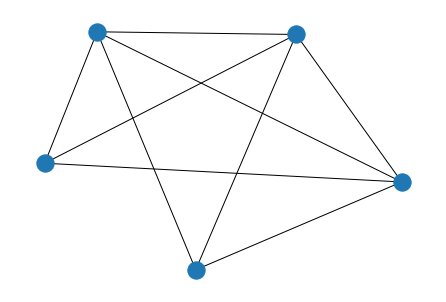

In [8]:
nx.draw(graph)

In [9]:
weighted_edges_list = [(1, 2, 9), (1, 3, 2), (1, 4, 4), (1, 5, 7),
    (2, 3, 3), (2, 4, 4), (3, 4, 4), (3, 5, 4), (4, 5, 6)
]

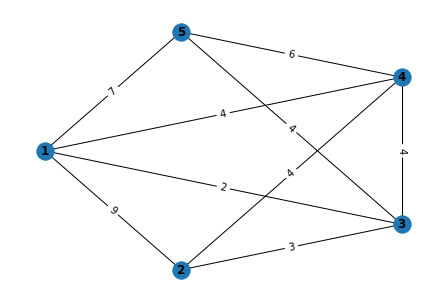

In [20]:
graph = nx.Graph()
graph.add_nodes_from(range(1, 6))
graph.add_weighted_edges_from(weighted_edges_list)
pos = nx.shell_layout(graph)
weights = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, font_weight='bold', font_size=12)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=weights)
plt.show()

In [21]:
graph.nodes

NodeView((1, 2, 3, 4, 5))

In [22]:
directed_graph = nx.DiGraph()
edges = [(1, 2), (1, 3), (2, 3), (3, 2), (3, 5), (4, 2), (4, 6),
    (5, 2), (5, 4), (5, 6), (6, 5)
]

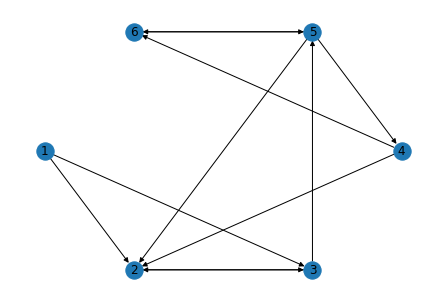

In [24]:
directed_graph.add_nodes_from(range(1, 7))
directed_graph.add_edges_from(edges)
pos = nx.shell_layout(directed_graph)
nx.draw(directed_graph, pos, with_labels=True)

In [26]:
list(graph.adjacency()) # 邻接表

[(1, {2: {'weight': 9}, 3: {'weight': 2}, 4: {'weight': 4}, 5: {'weight': 7}}),
 (2, {1: {'weight': 9}, 3: {'weight': 3}, 4: {'weight': 4}}),
 (3, {1: {'weight': 2}, 2: {'weight': 3}, 4: {'weight': 4}, 5: {'weight': 4}}),
 (4, {1: {'weight': 4}, 2: {'weight': 4}, 3: {'weight': 4}, 5: {'weight': 6}}),
 (5, {1: {'weight': 7}, 3: {'weight': 4}, 4: {'weight': 6}})]

In [28]:
nx.to_dict_of_lists(graph)

{1: [2, 3, 4, 5], 2: [1, 3, 4], 3: [1, 2, 4, 5], 4: [1, 2, 3, 5], 5: [1, 3, 4]}

In [30]:
adjacency_matrix = nx.to_numpy_matrix(graph)
adjacency_matrix

matrix([[0., 9., 2., 4., 7.],
        [9., 0., 3., 4., 0.],
        [2., 3., 0., 4., 4.],
        [4., 4., 4., 0., 6.],
        [7., 0., 4., 6., 0.]])